In [1]:
import sys
sys.path.append("..")
%matplotlib widget
from eomaps import Maps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from cartopy import crs as ccrs

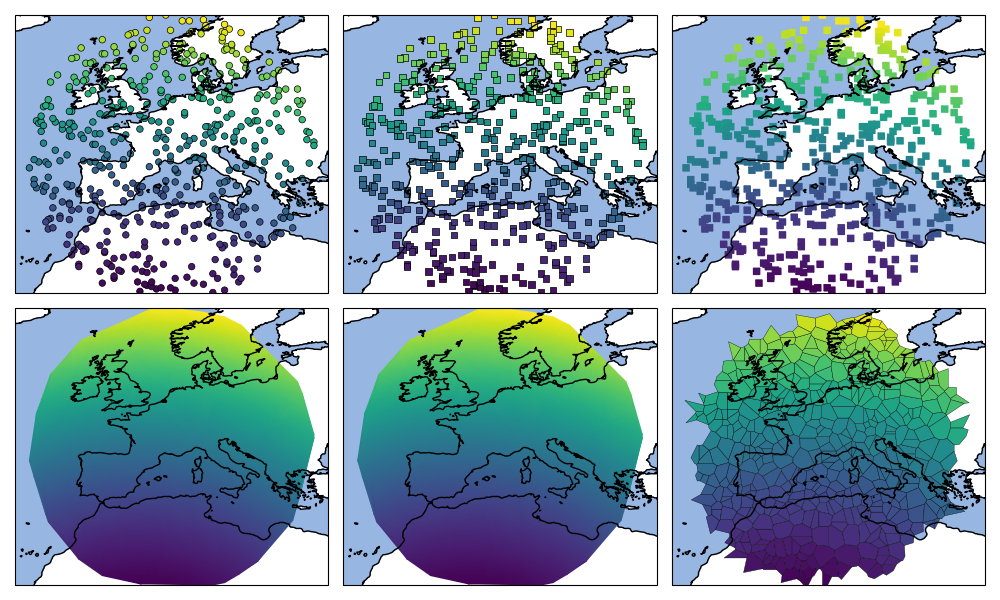

In [67]:
lon, lat = np.linspace(-180, 180, 1000), np.linspace(-90, 90, 1000)
lon, lat = np.meshgrid(lon, lat)

clon, clat = 5, 44
mask = np.sqrt((lon - clon)**2 + (lat - clat)**2) < 22
lon, lat = lon[mask], lat[mask]

data = lon**2 + lat**2
df = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data=data.flat))

usedata = df.sample(500)

f = plt.figure(figsize=(10, 6))
f.canvas.header_visible = False

gs = GridSpec(2, 3)

m = Maps()
m.set_data(data=usedata, xcoord="lon", ycoord="lat", parameter="data", crs=4326)
m.set_plot_specs(plot_epsg=4326, title="")

m.set_plot_specs(shape="ellipses", radius=.5)
m.plot_map(f_gridspec=[f, gs[0, 0]], edgecolor="k", linewidth=0.5,orientation="horizontal", colorbar=False, coastlines=True)

m.set_plot_specs(shape="rectangles")
m.plot_map(f_gridspec=[f, gs[0, 1]], edgecolor="k", linewidth=0.5,orientation="horizontal", colorbar=False, coastlines=True)

m.set_plot_specs(shape="trimesh_rectangles")
m.plot_map(f_gridspec=[f, gs[0, 2]], orientation="horizontal", colorbar=False, coastlines=True)

m.set_plot_specs(shape="delauney_triangulation_masked")
m.plot_map(f_gridspec=[f, gs[1, 0]], orientation="horizontal", colorbar=False, coastlines=True)

m.set_plot_specs(shape="delauney_triangulation_flat")
m.plot_map(f_gridspec=[f, gs[1, 1]], edgecolor="k", linewidth=0.5, orientation="horizontal", colorbar=False, coastlines=True)

m.set_plot_specs(shape="voroni", radius=1)
m.plot_map(f_gridspec=[f, gs[1, 2]], edgecolor="k", linewidth=0.25, orientation="horizontal", colorbar=False, coastlines=True)

f.tight_layout()
_ = m.add_callback("annotate")
